In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import statistics as sts
import numpy as np

In [ ]:
df=pd.read_csv('/content/titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [ ]:
mean_age=np.mean(df['age'])
mean_age

29.8811345124283

In [ ]:
df['age'].fillna(mean_age,inplace=True)

In [ ]:
df['age'].isnull().sum()

0

In [ ]:
mode_pclass=sts.mode(df['pclass'])
mode_pclass

3.0

In [ ]:
df['pclass'].fillna(mode_pclass,inplace=True)

In [ ]:
mode_survived=sts.mode(df['survived'])
mode_survived

0.0

In [ ]:
df['survived'].fillna(mode_survived,inplace=True)

<BarContainer object of 2 artists>

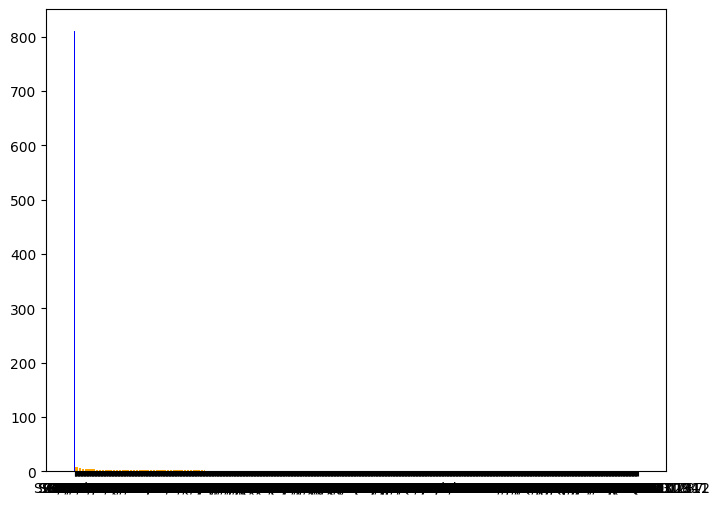

In [ ]:
ticket_count=df['ticket'].value_counts()
survived_count=df['survived'].value_counts()

fig,ax= plt.subplots(figsize=(8,6))

ax.bar(ticket_count.index,ticket_count.values,color='orange')
ax.bar(survived_count.index,survived_count.values,color='Blue')

Here the "Ticket" feature **does not have any high impact** on the output feature "Survived", so we can drop it


In [ ]:
df.drop(columns=['name','sibsp','parch','ticket','fare','cabin','boat','home.dest'],inplace=True)


In [ ]:
df

,pclass,survived,sex,age,embarked,body
0,1.0,1.0,female,29.000000,S,NaN
1,1.0,1.0,male,0.916700,S,NaN
2,1.0,0.0,female,2.000000,S,NaN
3,1.0,0.0,male,30.000000,S,135.0
4,1.0,0.0,female,25.000000,S,NaN
...,...,...,...,...,...,...
1305,3.0,0.0,female,29.881135,C,NaN
1306,3.0,0.0,male,26.500000,C,304.0
1307,3.0,0.0,male,27.000000,C,NaN
1308,3.0,0.0,male,29.000000,S,NaN


In [ ]:
mean_body=np.mean(df['body'])
mean_body

160.8099173553719

In [ ]:
df['body'].fillna(mean_body,inplace=True)

<BarContainer object of 2 artists>

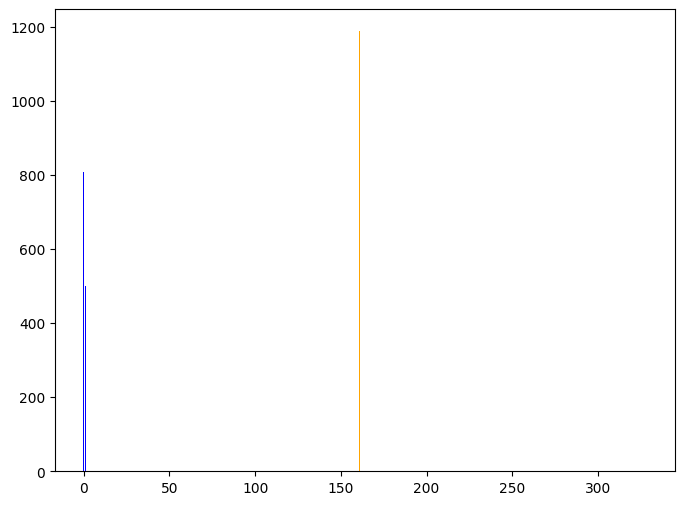

In [ ]:
body_count=df['body'].value_counts()

fig,ax=plt.subplots(figsize=(8,6))

ax.bar(body_count.index,body_count.values,color='orange')
ax.bar(survived_count.index,survived_count.values,color='Blue')

"Body" Feature has a high impact on the output feature"Survived"

In [ ]:
df

,pclass,survived,sex,age,embarked,body
0,1.0,1.0,female,29.000000,S,160.809917
1,1.0,1.0,male,0.916700,S,160.809917
2,1.0,0.0,female,2.000000,S,160.809917
3,1.0,0.0,male,30.000000,S,135.000000
4,1.0,0.0,female,25.000000,S,160.809917
...,...,...,...,...,...,...
1305,3.0,0.0,female,29.881135,C,160.809917
1306,3.0,0.0,male,26.500000,C,304.000000
1307,3.0,0.0,male,27.000000,C,160.809917
1308,3.0,0.0,male,29.000000,S,160.809917


In [ ]:
mode_sex=sts.mode(df['sex'])

In [ ]:
df['sex'].fillna(mode_sex,inplace=True)

In [ ]:
mode_embarked=sts.mode(df['embarked'])
df['embarked'].fillna(mode_embarked,inplace=True)

In [ ]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
embarked    0
body        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   sex       1310 non-null   object 
 3   age       1310 non-null   float64
 4   embarked  1310 non-null   object 
 5   body      1310 non-null   float64
dtypes: float64(4), object(2)
memory usage: 61.5+ KB


In [ ]:
df['gender']=df['sex'].map({'male':0,'female':1})

In [ ]:
df['embarked_new']=df['embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
df

,pclass,survived,sex,age,embarked,body,gender,embarked_new
0,1.0,1.0,female,29.000000,S,160.809917,1,0
1,1.0,1.0,male,0.916700,S,160.809917,0,0
2,1.0,0.0,female,2.000000,S,160.809917,1,0
3,1.0,0.0,male,30.000000,S,135.000000,0,0
4,1.0,0.0,female,25.000000,S,160.809917,1,0
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,29.881135,C,160.809917,1,1
1306,3.0,0.0,male,26.500000,C,304.000000,0,1
1307,3.0,0.0,male,27.000000,C,160.809917,0,1
1308,3.0,0.0,male,29.000000,S,160.809917,0,0


In [ ]:
x=df[['pclass','gender','age','embarked_new','body']]
y=df['survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtc.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0.

When to select which type of MATRIX :

https://chatgpt.com/share/34ff5a43-d3ac-4e65-9109-b3ed86949838

youtube : krish naik video

**Matrix knowledge in ML** notepad file Refer

In [ ]:
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.7963386727688787

In [ ]:
precision=precision_score(y_test, y_pred)
precision

0.7785714285714286

In [ ]:
recall=recall_score(y_test, y_pred)
recall

0.6526946107784432

In [ ]:
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[239,  31],
       [ 58, 109]])